# Linear Kater's Pendulum

First we derive an equation of motion for the pendulum:

$\sum\tau=\tau_g=-\lvert\vec{F_g}\times\vec{d}\rvert=-Mgd\sin\theta=I_0\ddot{\theta}$

Where $\tau$ is the torque, $M$ is the total mass of the pendulum, $g$ is the gravitational constant, $d$ is the distance from the centre of mass to the point about which the pendulum is rotating, $I_0$ is the moment of inertia about the point of roatation, and $\ddot{\theta}$ is the angular acceleration.

Rearranging our equation of motion we get:

$\ddot{\theta}+\frac{Mgd}{I_0}\sin\theta=0$

However, for small angles $\sin\theta=\theta$ so:

$\ddot{\theta}+\frac{Mgd}{I_0}\theta=0$

This has the solution:

$\theta=\theta_0\sin(\sqrt{\frac{Mgd}{I_0})}t$

The time period of the pendulum derived from this equation is:

$T=2\pi\sqrt{\frac{I_0}{Mgd}}$

From the parallel axis theorem, we know that the moment of inertia of an object about an axis parallel to an axis through its centre of mass is related to the moment of inertia about that centre of mass, $I_c$, by:

$I_0=I_c+MR^2$

Where R is the distance between the two axes. In this case, the axis of $I_0$ and $I_c$.

The moment of inertia about the centre of mass is the sum of the moments of inertia for the rod and disks is:

$I_c=\frac{1}{12}M_1(L^2+W^2)+M_1R_1^2+\frac{1}{2}M_2r_1^2+M_2R_2^2+\frac{1}{2}M_3r_2^2+M_3R_3^2$

Where $M_1$ is the mass of the rod, $M_2$ is the mass of the first disk, and $M_3$ is the mass of the second disk. $L$ and $W$ are the length and width of the rod and $r_1$ and $r_2$ are the radii of the two disks. Finally, $R_1$, $R_2$ and $R_3$ are the respective perpendicular distances between their centres of mass and the centre of mass of the combined object.

Substituting the equation for $I_0$ into the equation for the time period:

$T_1=2\pi\sqrt{\frac{I_c+Ml_1^2}{Mgl_1}}$

$T_2=2\pi\sqrt{\frac{I_c+Ml_2^2}{Mgl_2}}$

Where $l_1$ and $l_2$ are the distances between each respective pivot point and the centre of mass.

If the weights on the pendulum are adjusted such that $T_1=T_2$, then:

$(I_c+Ml_1^2)l_2=(I_c+Ml_2^2)l_1$

and

$I_c(l_2-l_1)=Ml_1l_2(l_2-l_1)$

or 

$I_c=Ml_1l_2$

Provided $l_1$ differs significantly from $l_2$, that is, the pendulum is quite asymmetric.

Substituting the equation for $I_c$ at equal time periods into the equation for either $T_1$ or $T_2$:

$T=2\pi\sqrt{\frac{l_1+l_2}{g}}=2\pi\sqrt{\frac{L}{g}}$

Where L is the distance between the two pivot points of Kater's Pendulum.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.ticker as ticker
%config InlineBackend.figure_format = 'retina'

In [2]:
g = 9.81137 # Acceleration due to gravity

L, W = 1.672, 0.01598 # Length and width of rod
r_1, r_2 = 0.04701, 0.04701 # Radii of the cylinders
P_1, P_2 = 0.338, 1.3324 # Positions of the knife edges

m_1, x_1 = 1.261, L/2 # Mass of the rod and its centre of mass
m_2, x_2 = 1.00256, 0.088 # Mass of the first disk and its centre of mass
m_3, x_3 = 1.4048, np.arange(0.55, 1.1, 0.0005) # Mass of the second disk and its centres of mass as it is moved

M = m_1 + m_2 + m_3 # Total mass

C_of_M = (m_1 * x_1 + m_2 * x_2 + m_3 * x_3) / M # Array of the centres of mass


l_1, l_2 = C_of_M - P_1, P_2 - C_of_M # Array of the distances between the centres of mass and the knife edges

R_1 = C_of_M - x_1 # Array of the distances between the centres of mass and the centre of mass of the rod
R_2 = C_of_M - x_2 # Array of the distances between the centres of mass and the centre of mass of the first disk
R_3 = C_of_M - x_3 # Array of the distances between the centres of mass and the centre of mass of the second disk

I_c = 1/12 * m_1 * (L**2 + W**2) + m_1 * R_1**2 + 1/2 * m_2 * r_1**2 + m_2 * R_2**2 + 1/2 * m_3 * r_2**2 + m_3 * R_3**2 # Inertia about the centre of mass

T_1 = 2 * np.pi * np.sqrt((I_c + M * l_1**2) / (M * g * l_1)) # Time periods for first position
T_2 = 2 * np.pi * np.sqrt((I_c + M * l_2**2) / (M * g * l_2)) # Time periods for second position

Intersection point 1: x = 0.687, T_1 = 2.000, T_2 = 2.000
Intersection point 2: x = 0.307, T_1 = 2.000, T_2 = 2.000


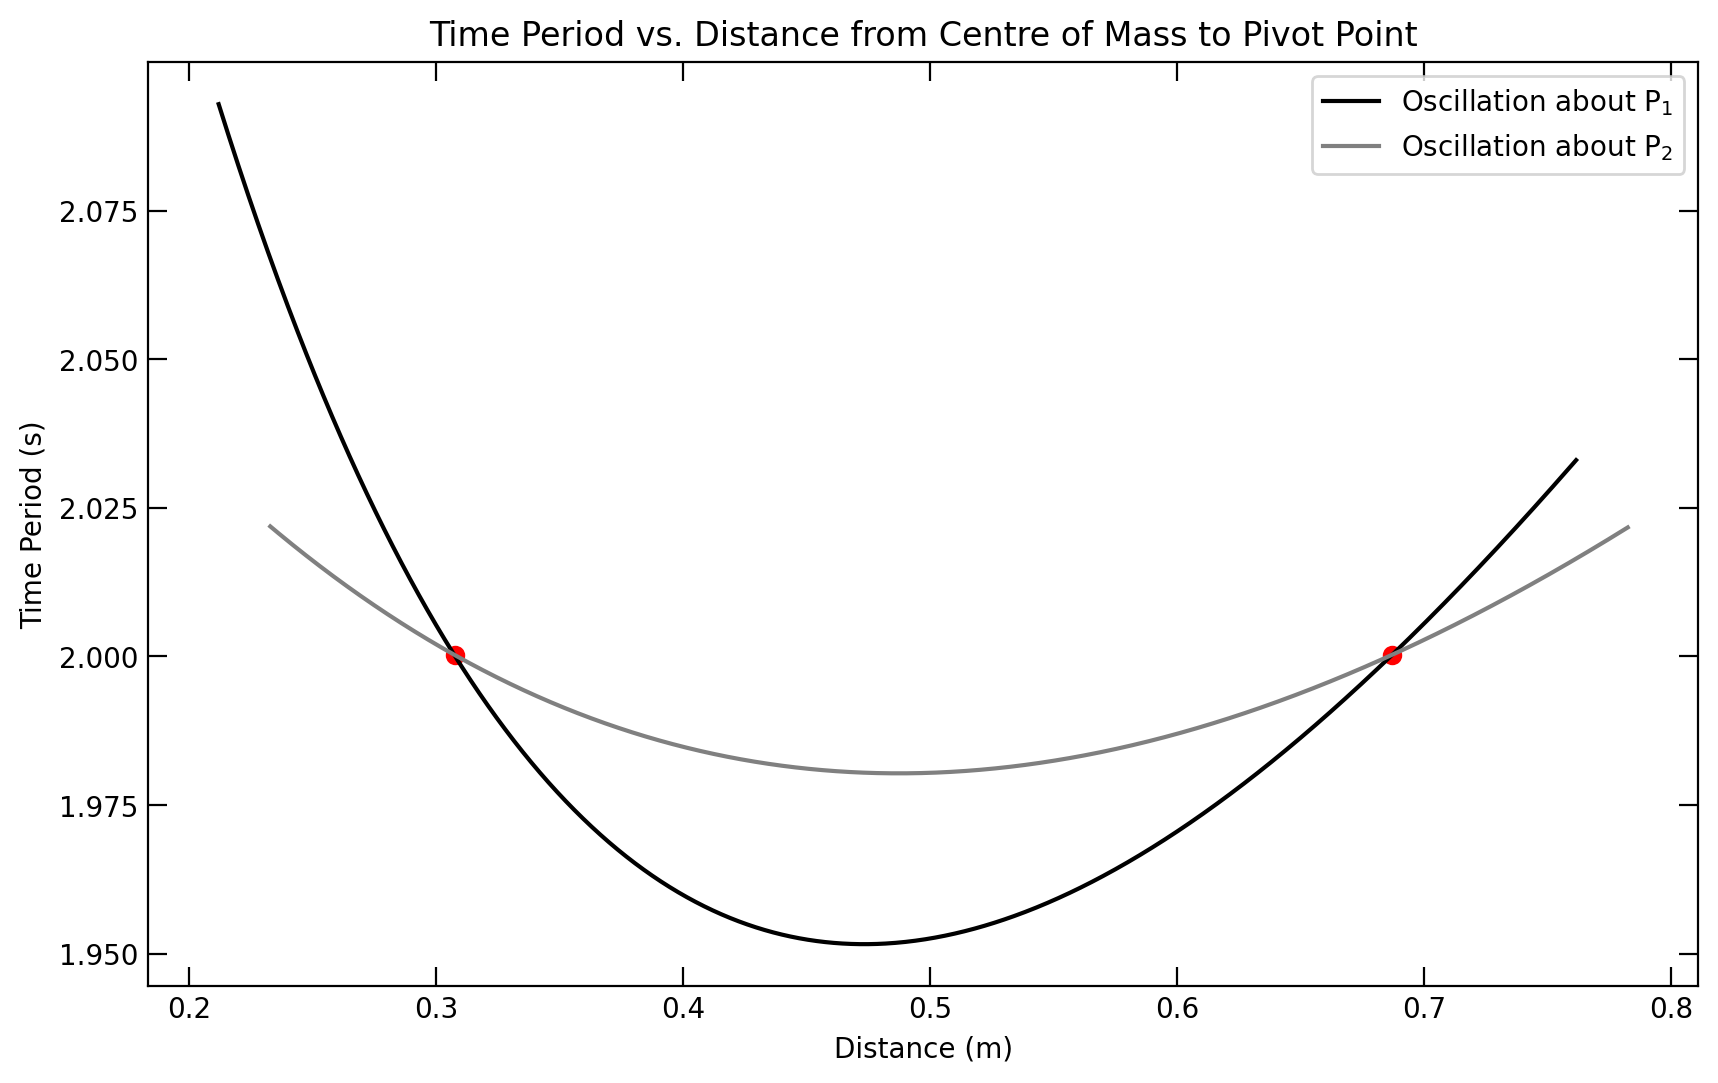

In [3]:
fig = plt.figure(figsize=(10,6))

l_1 = x_3 - P_1
l_2 = P_2 - x_3

plt.plot(l_1, T_1, color = 'black', label = r'Oscillation about P$_1$')
plt.plot(l_2, T_2, color = 'grey', label = r'Oscillation about P$_2$')

sort_diff = np.argsort(np.abs(T_1 - T_2))
min_diff_1 = sort_diff[0]

# Finding second smallest index not next to the first intersect
minX_threshold = 0.1
min_diff_2 = None
for i in sort_diff[1:]:
    if np.abs(l_1[i] - l_1[min_diff_1]) > minX_threshold:
        min_diff_2 = i
        break
        
intersect_1 = l_1[min_diff_1]
intersect_2 = l_1[min_diff_2]

plt.scatter([intersect_1, intersect_2], [T_1[min_diff_1], T_1[min_diff_2]], color='red')

print(f"Intersection point 1: x = {intersect_1:.3f}, T_1 = {T_1[min_diff_1]:.3f}, T_2 = {T_2[min_diff_1]:.3f}")
print(f"Intersection point 2: x = {intersect_2:.3f}, T_1 = {T_1[min_diff_2]:.3f}, T_2 = {T_2[min_diff_2]:.3f}")

plt.legend(fontsize = 10 ) 
plt.xlabel('Distance (m)')
plt.ylabel('Time Period (s)')
plt.title('Time Period vs. Distance from Centre of Mass to Pivot Point')

plt.tick_params(direction='in',
                length=7,
                bottom='on',
                left='on',
                top='on',
                right='on',
                
               )

plt.rcParams.update({'font.size':22})  

plt.show()